# parallel workflow

In [76]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [77]:
class BMState(TypedDict):
    balls: int
    runs: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundry_percent:float
    summary:str



In [78]:
# code for cal_strike
def cal_strike(state:BMState)->BMState:
    sr=(state['runs']/state['balls'])*100

    return {'sr':sr}

In [79]:
# code for cal_bpb
def cal_bpb(state:BMState)->BMState:
    bpb = state['balls']/(state['fours'] + state['sixes'])
    return {'bpb':bpb}

In [80]:
# code for cal_bp
def cal_bp(state:BMState)->BMState:
    boundry_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100
    return {'boundry_percent':boundry_percent}

In [81]:
# code for summary

def summary(state: BMState)->BMState:

    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundry_percent']}
"""
    
    return {'summary': summary}

In [82]:
graph=StateGraph(BMState)

graph.add_node('cal_strike',cal_strike)
graph.add_node('cal_bpb',cal_bpb)
graph.add_node('cal_bp',cal_bp)
graph.add_node('summary',summary)

graph.add_edge(START,'cal_strike')
graph.add_edge(START,'cal_bpb')
graph.add_edge(START,'cal_bp')
graph.add_edge('cal_strike','summary')
graph.add_edge('cal_bpb','summary')
graph.add_edge('cal_bp','summary')

graph.add_edge('summary',END)

workflow=graph.compile()

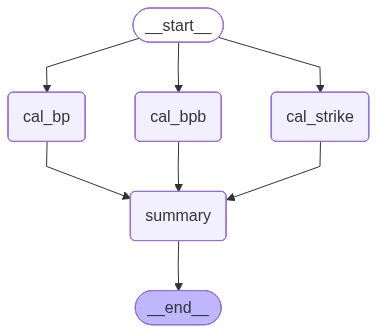

In [83]:
workflow

In [84]:
result=workflow.invoke(
    {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}
)

In [85]:
result

{'balls': 50,
 'runs': 100,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundry_percent': 48.0,
 'summary': '\nStrike Rate - 200.0 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 48.0\n'}